In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [34]:
df = pd.read_csv("../../data/raw/bigml_59c28831336c6604c800002a.csv")
pd.set_option('display.max_columns', None)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### target = churn
### maybe no accuracy score models? Maybe use SMOTE?
### what does area codes mean in this context?
I cant really say but best guess is that there are many Syrian refugees spread accross the United States and as of 2017 four percent of the total influx from 2012 to 2017 were in  Sacramento or San Diego. Possible many people began there and moved to other places or got them to talk to loved ones. Another possibility is these are area codes linked to scam calls.  There is no way to be certain without speaking directly to the company in Damascus.

### what does account length mean in this context?


## Errors!

- Type one: Predicting Someone will Churn but they don't. (False Pos)
- Type two: Predicting someone will not Churn but they do. (False neg)

### About SyriaTel
SyriaTel is a mobile communications company based in Damascus Syria. Founded in the year 2000, it is currently the largest provider of cell service to the Syrian territory with about 3,500 employees and  about 8 million customers.  
#### info from: https://www.linkedin.com/company/syriatel

## Business Problem

SyriaTel is experiencing a loss in its customer base and is asking our group to identify whether people will stop using their service at some point in the near future.

## Data exploration

In [35]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [36]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [5]:
df.drop('phone number', axis=1, inplace=True)

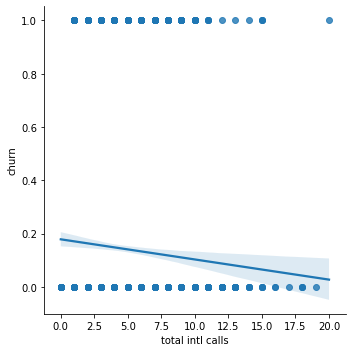

In [37]:
sns.lmplot('total intl calls', 'churn', data=df);

#### The more international calls made the less likely to churn?

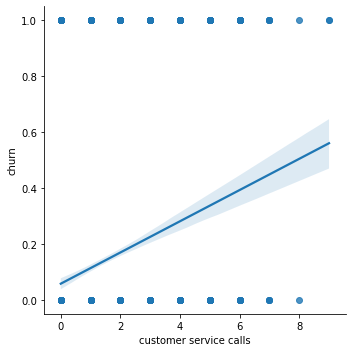

In [38]:
sns.lmplot('customer service calls', 'churn', data=df);

#### Obvious linear relationship 

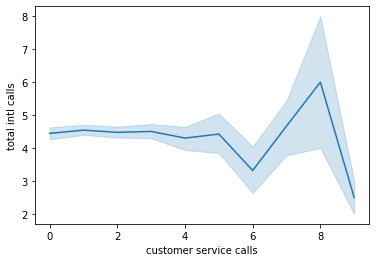

In [39]:
sns.lineplot('customer service calls','total intl calls', data=df);

#### Why more customer service calls = more international calls?  maybe people need help calling internationally?

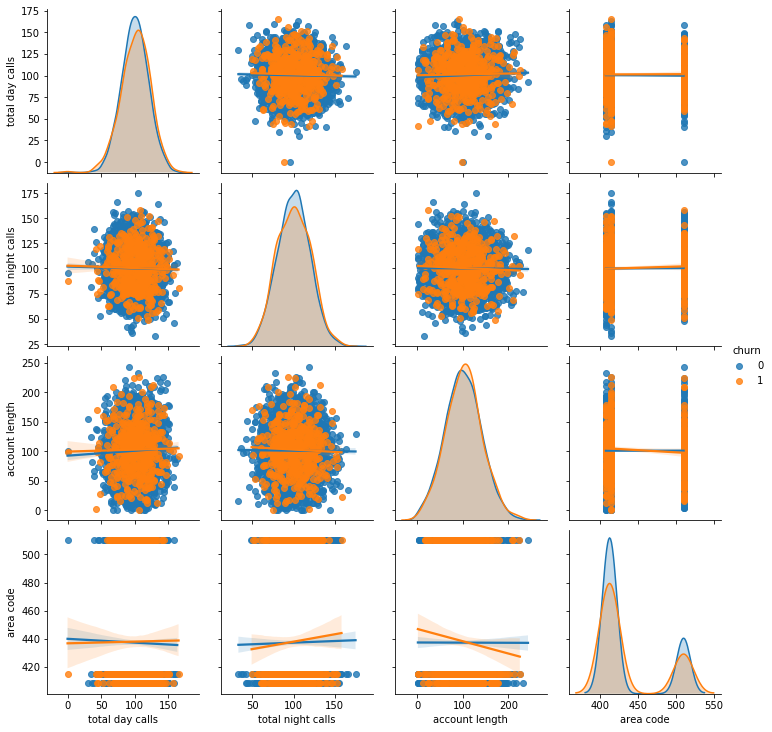

In [80]:
pplot= df[['churn','total day calls','total night calls','account length','area code']]

sns.pairplot(pplot, kind="reg", hue='churn')
plt.show()

In [41]:
churn_by_state = pd.crosstab(df['state'], df['churn'])
churn_by_state

churn,False,True
state,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


## First Simple Model

In [42]:
df['churn'] = df['churn'].astype(int)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [14]:
df['churn'] = df['churn'].astype(int)
y = df.churn
X= df.drop('churn', axis=1)

In [ ]:
X.dtypes.value_counts()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
print(X_train.shape)
print(y_train.shape)

(2666, 19)
(2666,)


In [16]:
# dropped these to check for diff in area code influence on outome.
# I will keep them in the second simple model.
X_train_sml = X_train.drop(columns=['state', 'area code', 
                      'international plan', 
                      'voice mail plan'])
X_train_sml

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,243,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,108,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,75,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,141,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,86,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1
1130,122,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1
1294,66,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1
860,169,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2


In [17]:
ss = StandardScaler()
X_train_sml = pd.DataFrame(ss.fit_transform(X_train_sml), index=X_train_sml.index, columns=X_train_sml.columns)
X_train_sml

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,3.601382,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,1.256197,-1.300791,0.634849,-1.304132,0.318978
1373,0.184951,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,0.164841,-2.194793,-0.184370,-2.191525,1.813519
679,-0.650176,-0.584936,0.787609,-1.133785,0.787772,2.491952,0.549667,2.493068,0.147339,0.209205,0.147309,-0.549828,1.863677,-0.549186,-0.428293
56,1.020079,-0.584936,-0.969818,-0.127888,-0.970200,-0.408385,-1.890695,-0.408439,-1.178086,1.437368,-1.176344,-0.800149,-1.003589,-0.800835,-0.428293
1993,-0.371801,-0.584936,0.675354,-0.228477,0.675192,1.294330,-1.143645,1.295326,0.265680,0.516246,0.265649,-2.051753,-0.593980,-2.045833,-1.175564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.134337,-0.584936,1.744532,0.978599,1.744697,-0.041404,-0.894629,-0.041689,-0.783614,-1.940082,-0.781878,-1.515351,-0.593980,-1.516047,-0.428293
1130,0.539248,-0.584936,-2.659156,-1.938502,-2.658892,-0.392601,-0.546006,-0.392191,1.007287,-2.144776,1.006369,0.880576,-1.003589,0.881237,-0.428293
1294,-0.877938,-0.584936,-1.693032,-1.234374,-1.693306,1.209490,0.549667,1.209441,-0.314193,1.283848,-0.312901,-0.371028,0.225239,-0.377006,-0.428293
860,1.728672,-0.584936,-0.007374,0.525945,-0.007862,-0.503090,1.495930,-0.503609,0.553644,-0.404877,0.554924,-0.120707,0.634849,-0.125357,0.318978


In [43]:
cross_val_score(LogisticRegression(), X_train_sml, y_train, cv=3, scoring='f1')

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.11688312, 0.23529412, 0.09929078])

In [44]:
cross_val_score(LogisticRegression(C=.1, class_weight='balanced'), X_train_sml, y_train, cv=3, scoring='f1')

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.38207547, 0.38681319, 0.4       ])

In [83]:
firstmod_mean = cross_val_score(LogisticRegression(C=.1, class_weight='balanced'), X_train_sml, y_train, cv=3, scoring='f1').mean()
firstmod_mean

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.38962955283710005

## Second Model
Changing Area code and adding it to the numbers.

In [45]:
# I will be leaving all of the categorical data out of the dataframe
# for this second simple model and leaving in area code instead.
X_train_ac= X_train.drop(columns=['state','international plan', 
                      'voice mail plan'])
X_train_ac.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,243,510,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,108,415,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,75,415,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,141,415,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,86,510,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0


In [46]:
ss= StandardScaler()
X_train_ac = pd.DataFrame(ss.fit_transform(X_train_ac), index=X_train_ac.index, columns=X_train_ac.columns)
X_train_ac

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,3.601382,1.735840,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,1.256197,-1.300791,0.634849,-1.304132,0.318978
1373,0.184951,-0.517168,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,0.164841,-2.194793,-0.184370,-2.191525,1.813519
679,-0.650176,-0.517168,-0.584936,0.787609,-1.133785,0.787772,2.491952,0.549667,2.493068,0.147339,0.209205,0.147309,-0.549828,1.863677,-0.549186,-0.428293
56,1.020079,-0.517168,-0.584936,-0.969818,-0.127888,-0.970200,-0.408385,-1.890695,-0.408439,-1.178086,1.437368,-1.176344,-0.800149,-1.003589,-0.800835,-0.428293
1993,-0.371801,1.735840,-0.584936,0.675354,-0.228477,0.675192,1.294330,-1.143645,1.295326,0.265680,0.516246,0.265649,-2.051753,-0.593980,-2.045833,-1.175564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.134337,1.735840,-0.584936,1.744532,0.978599,1.744697,-0.041404,-0.894629,-0.041689,-0.783614,-1.940082,-0.781878,-1.515351,-0.593980,-1.516047,-0.428293
1130,0.539248,-0.517168,-0.584936,-2.659156,-1.938502,-2.658892,-0.392601,-0.546006,-0.392191,1.007287,-2.144776,1.006369,0.880576,-1.003589,0.881237,-0.428293
1294,-0.877938,-0.683179,-0.584936,-1.693032,-1.234374,-1.693306,1.209490,0.549667,1.209441,-0.314193,1.283848,-0.312901,-0.371028,0.225239,-0.377006,-0.428293
860,1.728672,-0.517168,-0.584936,-0.007374,0.525945,-0.007862,-0.503090,1.495930,-0.503609,0.553644,-0.404877,0.554924,-0.120707,0.634849,-0.125357,0.318978


In [47]:
cross_val_score(LogisticRegression(class_weight='balanced'),X_train_ac, y_train, cv=3, scoring='f1')

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.38072289, 0.40604752, 0.39810427])

In [84]:
scndmod_mean = cross_val_score(LogisticRegression(class_weight='balanced'),X_train_ac, y_train, cv=3, scoring='f1').mean()
scndmod_mean

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.3949582243892709

## Third model

In [48]:
# In this model I will one hot encode area code and the 
# categorical features.
ohe = OneHotEncoder(sparse=False)
oh_features= pd.concat([X_train['state'],X_train['international plan'], 
                      X_train['voice mail plan'], 
                      X_train['area code']], axis=1)
oh_features

,state,international plan,voice mail plan,area code
817,UT,no,no,510
1373,SC,no,no,415
679,TX,yes,no,415
56,CO,no,no,415
1993,IN,no,no,510
...,...,...,...,...
1095,ID,no,no,510
1130,PA,no,no,415
1294,OR,no,no,408
860,HI,no,no,415


In [49]:
ohe.fit_transform(oh_features)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [50]:
oh_features_df = pd.DataFrame(ohe.fit_transform(oh_features), 
                       columns=ohe.get_feature_names(oh_features.columns), 
                       index=oh_features.index)

In [51]:
oh_features_df

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,area code_408,area code_415,area code_510
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [52]:
X_train_drop = X_train.drop(columns=['state', 'international plan', 'voice mail plan', 'area code'])
X_train_drop

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,243,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,108,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,75,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,141,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,86,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1
1130,122,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1
1294,66,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1
860,169,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2


In [53]:
ss= StandardScaler()
X_train_drop = pd.DataFrame(ss.fit_transform(X_train_drop), index=X_train_drop.index, columns=X_train_drop.columns)
X_train_drop

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,3.601382,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,1.256197,-1.300791,0.634849,-1.304132,0.318978
1373,0.184951,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,0.164841,-2.194793,-0.184370,-2.191525,1.813519
679,-0.650176,-0.584936,0.787609,-1.133785,0.787772,2.491952,0.549667,2.493068,0.147339,0.209205,0.147309,-0.549828,1.863677,-0.549186,-0.428293
56,1.020079,-0.584936,-0.969818,-0.127888,-0.970200,-0.408385,-1.890695,-0.408439,-1.178086,1.437368,-1.176344,-0.800149,-1.003589,-0.800835,-0.428293
1993,-0.371801,-0.584936,0.675354,-0.228477,0.675192,1.294330,-1.143645,1.295326,0.265680,0.516246,0.265649,-2.051753,-0.593980,-2.045833,-1.175564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.134337,-0.584936,1.744532,0.978599,1.744697,-0.041404,-0.894629,-0.041689,-0.783614,-1.940082,-0.781878,-1.515351,-0.593980,-1.516047,-0.428293
1130,0.539248,-0.584936,-2.659156,-1.938502,-2.658892,-0.392601,-0.546006,-0.392191,1.007287,-2.144776,1.006369,0.880576,-1.003589,0.881237,-0.428293
1294,-0.877938,-0.584936,-1.693032,-1.234374,-1.693306,1.209490,0.549667,1.209441,-0.314193,1.283848,-0.312901,-0.371028,0.225239,-0.377006,-0.428293
860,1.728672,-0.584936,-0.007374,0.525945,-0.007862,-0.503090,1.495930,-0.503609,0.553644,-0.404877,0.554924,-0.120707,0.634849,-0.125357,0.318978


In [54]:
X_train_drop = pd.concat([X_train_drop, oh_features_df], join='inner', axis=1)
X_train_drop

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,area code_408,area code_415,area code_510
817,3.601382,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,1.256197,-1.300791,0.634849,-1.304132,0.318978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1373,0.184951,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,0.164841,-2.194793,-0.184370,-2.191525,1.813519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
679,-0.650176,-0.584936,0.787609,-1.133785,0.787772,2.491952,0.549667,2.493068,0.147339,0.209205,0.147309,-0.549828,1.863677,-0.549186,-0.428293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
56,1.020079,-0.584936,-0.969818,-0.127888,-0.970200,-0.408385,-1.890695,-0.408439,-1.178086,1.437368,-1.176344,-0.800149,-1.003589,-0.800835,-0.428293,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1993,-0.371801,-0.584936,0.675354,-0.228477,0.675192,1.294330,-1.143645,1.295326,0.265680,0.516246,0.265649,-2.051753,-0.593980,-2.045833,-1.175564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.134337,-0.584936,1.744532,0.978599,1.744697,-0.041404,-0.894629,-0.041689,-0.783614,-1.940082,-0.781878,-1.515351,-0.593980,-1.516047,-0.428293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1130,0.539248,-0.584936,-2.659156,-1.938502,-2.658892,-0.392601,-0.546006,-0.392191,1.007287,-2.144776,1.006369,0.880576,-1.003589,0.881237,-0.428293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1294,-0.877938,-0.584936,-1.693032,-1.234374,-1.693306,1.209490,0.549667,1.209441,-0.314193,1.283848,-0.312901,-0.371028,0.225239,-0.377006,-0.428293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [55]:
X_train_drop.isna().sum()

account length           0
number vmail messages    0
total day minutes        0
total day calls          0
total day charge         0
                        ..
voice mail plan_no       0
voice mail plan_yes      0
area code_408            0
area code_415            0
area code_510            0
Length: 73, dtype: int64

In [57]:
cross_val_score(LogisticRegression(class_weight='balanced'),X_train_drop, y_train, cv=3, scoring='f1')

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.45685279, 0.46428571, 0.48453608])

In [ ]:
thrdmod

## Fourth model

In [58]:
# I'm going to try random forests

X_train_rf = X_train.drop(columns=['state', 'international plan', 'voice mail plan'])
X_train_rf

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,243,510,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,108,415,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,75,415,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,141,415,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,86,510,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,510,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1
1130,122,415,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1
1294,66,408,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1
860,169,415,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2


In [59]:
rfc= RandomForestClassifier(class_weight='balanced',n_estimators=15)
cross_val_score(rfc, X_train_rf, y_train, cv=3, scoring='f1')

array([0.60638298, 0.657277  , 0.61458333])

In [60]:
# I'm going to try running a decision tree classifier on the data
# to see if it will help or not

param_grid = {'n_estimators': [129,],
             'criterion': ['entropy'],
             'max_depth': (15,16,17,18,19,20),
             'min_samples_leaf':[2]}
gtree = GridSearchCV(rfc, param_grid, cv=5, scoring='f1')
gtree.fit(X_train_rf, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=15, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                 

In [61]:
gtree.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 2,
 'n_estimators': 129}

In [62]:
rfc= RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=9, criterion='entropy')
cross_val_score(rfc, X_train_rf, y_train, cv=3, scoring='f1')

array([0.67      , 0.67272727, 0.66666667])

In [63]:
rfc= RandomForestClassifier(class_weight='balanced', n_estimators=100,min_samples_leaf=1, max_depth=10, criterion='entropy')
cross_val_score(rfc, X_train_rf, y_train, cv=3, scoring='f1')

array([0.59893048, 0.67281106, 0.66      ])

In [64]:
rfc= RandomForestClassifier(class_weight='balanced', n_estimators=129,min_samples_leaf=2, max_depth=15, criterion='entropy')
cross_val_score(rfc, X_train_rf, y_train, cv=3, scoring='f1')

array([0.62105263, 0.72222222, 0.67      ])

In [65]:
rfc= RandomForestClassifier(class_weight='balanced', n_estimators=129,min_samples_leaf=2, max_depth=16, criterion='entropy')
cross_val_score(rfc, X_train_rf, y_train, cv=3, scoring='f1')

array([0.59893048, 0.68807339, 0.65671642])

## Fifth Model

In [20]:
# I didn't incorporate the categorical data into the fourth model
# so I have one hot encodded it and I will add it to this model.

X_train_fm = X_train.drop(columns=['state', 'international plan', 'voice mail plan', 'area code'])
X_train_fm

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,243,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,108,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,75,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,141,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,86,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1
1130,122,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1
1294,66,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1
860,169,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2


In [66]:
X_train_fm = pd.concat([X_train_fm, oh_features_df], join='inner', axis=1)
X_train_fm

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,area code_408,area code_415,area code_510
817,243,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1373,108,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
679,75,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
56,141,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1993,86,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1130,122,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1294,66,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
860,169,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
rfc= RandomForestClassifier(class_weight='balanced',n_estimators=15)
cross_val_score(rfc, X_train_fm, y_train, cv=3, scoring='f1')

In [67]:
from sklearn.metrics import confusion_matrix
rfc.fit(X_train_fm, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=129, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [68]:
confusion_matrix(y_train, rfc.predict(X_train_fm))

array([[2284,    0],
       [  27,  355]])

## Sixth Model

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
# Ali asked us to make a decision tree classifier model.

dtc = DecisionTreeClassifier()
dtc.fit(X_train_fm, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
dtc.score(X_train_fm,y_train)

1.0

In [72]:
cross_val_score(dtc, X_train_fm, y_train, cv=3, scoring='f1')

array([0.69635628, 0.65637066, 0.78225806])

In [73]:
cross_val_score(dtc, X_train_fm, y_train, cv=3, scoring='f1').mean()

0.703270200135404

In [75]:
list(zip(dtc.feature_importances_, X_train_fm.columns ))

[(0.022313225895158585, 'account length'),
 (0.05192789491726323, 'number vmail messages'),
 (0.23230546171392497, 'total day minutes'),
 (0.018594302045299993, 'total day calls'),
 (0.03270104237213985, 'total day charge'),
 (0.059793058949716864, 'total eve minutes'),
 (0.024803127241175393, 'total eve calls'),
 (0.05997778650505377, 'total eve charge'),
 (0.02011914890247487, 'total night minutes'),
 (0.015640650879642625, 'total night calls'),
 (0.032944112689567644, 'total night charge'),
 (0.08400678930034032, 'total intl minutes'),
 (0.06739587264724362, 'total intl calls'),
 (0.011711073686676779, 'total intl charge'),
 (0.10582435911329909, 'customer service calls'),
 (0.0, 'state_AK'),
 (0.002833633514647769, 'state_AL'),
 (0.0, 'state_AR'),
 (0.0002342716574991804, 'state_AZ'),
 (0.0005323725481540347, 'state_CA'),
 (0.0014815172937691476, 'state_CO'),
 (0.000863620604296257, 'state_CT'),
 (0.0005451666338553016, 'state_DC'),
 (0.0, 'state_DE'),
 (0.0026917005213761, 'state_

In [76]:
from sklearn.tree import plot_tree

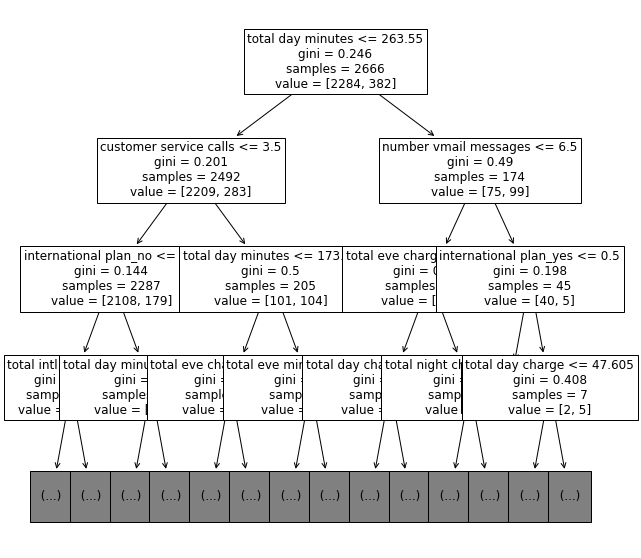

In [78]:
fig, ax= plt.subplots(figsize=(10,10))
plot_tree(dtc, max_depth=3, feature_names=X_train_fm.columns, ax=ax, fontsize=12);

## Discussion with Erin about what to do with my models at this point.
- Review descision trees and ensemble lectures
- Put onehotted categorical features back into my model
- spend some time trying to figure out what features may be causing the overfitting and use binning or some other method to fix my data.

In [ ]:
y_train.value_counts()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
rfc.fit(X_train_rf, y_train)

In [ ]:
confusion_matrix(y_train, rfc.predict(X_train_rf))

In [ ]:
X_t, X_val, y_t, y_val = train_test_split(X_train_rf, y_train, random_state=42)

In [ ]:
rfc.fit(X_t, y_t)

In [ ]:
confusion_matrix(y_t, rfc.predict(X_t))

In [ ]:
confusion_matrix(y_val, rfc.predict(X_val))

In [ ]:
y_val.shape

In [ ]:
rfc.feature_importances_

In [ ]:
X_val.columns

In [ ]:
list(zip(rfc.feature_importances_, X_val.columns ))

In [ ]:
X_val[['total day minutes']].describe()